#   example 9.3 JW Facor anaysis of consumer preference data 

In [2]:
Sigma <- matrix(c(1,.02,.96,.42,.01,.02,1,.13,.71,.85,.96,.13,1,.5,.11,.42,.71,.5,1,.79,.01,.85,.11,.79,1), nrow=5, byrow=T)

In [3]:
Sigma


1.00,0.02,0.96,0.42,0.01
0.02,1.00,0.13,0.71,0.85
0.96,0.13,1.00,0.50,0.11
0.42,0.71,0.50,1.00,0.79
0.01,0.85,0.11,0.79,1.00


In [4]:
egs = eigen(Sigma)

In [5]:
V = egs$vectors
Lambdas = egs$values
D = diag(egs$values)

In [6]:
print('vectors')
print(V)
print('lambdas')
print(Lambdas)
print('D')
print(D)

[1] "vectors"
          [,1]        [,2]        [,3]       [,4]         [,5]
[1,] 0.3314539 -0.60721643  0.09848524  0.1386643  0.701783012
[2,] 0.4601593  0.39003172  0.74256408 -0.2821170  0.071674637
[3,] 0.3820572 -0.55650828  0.16840896  0.1170037 -0.708716714
[4,] 0.5559769  0.07806457 -0.60158211 -0.5682357  0.001656352
[5,] 0.4725608  0.40418799 -0.22053713  0.7513990  0.009012569
[1] "lambdas"
[1] 2.85309042 1.80633245 0.20449022 0.10240947 0.03367744
[1] "D"
        [,1]     [,2]      [,3]      [,4]       [,5]
[1,] 2.85309 0.000000 0.0000000 0.0000000 0.00000000
[2,] 0.00000 1.806332 0.0000000 0.0000000 0.00000000
[3,] 0.00000 0.000000 0.2044902 0.0000000 0.00000000
[4,] 0.00000 0.000000 0.0000000 0.1024095 0.00000000
[5,] 0.00000 0.000000 0.0000000 0.0000000 0.03367744


In [7]:
# 5 eigen vectors 
e1 <- V[,1]
e2 <- V[,2]
e3 <- V[,3]
e4 <- V[,4]
e5 <- V[,5]

In [8]:
# first two eigen values, lambda1 and lambda2
print(Lambdas)
l1 = Lambdas[1]
l2 = Lambdas[2]

[1] 2.85309042 1.80633245 0.20449022 0.10240947 0.03367744


In [9]:
# sum of lambdas almos equal to p = 5
p = dim(Sigma)[1]
sum(Lambdas) 
all.equal(p, sum(Lambdas))

[1] 5

[1] TRUE

In [10]:
#for m = 2 common factors will account a cumulative proptin as follows 
m = 2

sum(Lambdas[1:m]) / p

[1] 0.9318846

In [11]:
Lambdas[1:2]

[1] 2.853090 1.806332

In [12]:
# estimating factors

In [13]:
Fl1 = round(sqrt(Lambdas[1]) * e1, 2)
Fl2 = round(sqrt(Lambdas[2]) * e2, 2)

In [14]:
print(Fl1)
print(Fl2)

[1] 0.56 0.78 0.65 0.94 0.80
[1] -0.82  0.52 -0.75  0.10  0.54


In [15]:
# calculate communalities 
# h1 = Fl1^2 + Fl2^2 + ... + Flp^2
h2 = round((Fl1**2) + (Fl2**2),2)

In [16]:
h2

[1] 0.99 0.88 0.99 0.89 0.93

In [17]:
# specific variance, upper case epsilon 
# Epsilon_i (i = 1 .. p) = 1 - hi ^ 2
Eps  = round(1- h2,3)

In [18]:
Eps

[1] 0.01 0.12 0.01 0.11 0.07

# now put it all together 

In [19]:
# factor loading matrix with m = 2

L = matrix(cbind(Fl1, Fl2), ncol=2)
Epsilon_mat = diag(Eps)

In [20]:
Epsilon_mat

0.01,0.00,0.00,0.00,0.00
0.00,0.12,0.00,0.00,0.00
0.00,0.00,0.01,0.00,0.00
0.00,0.00,0.00,0.11,0.00
0.00,0.00,0.00,0.00,0.07


In [21]:
#Estimaed sigma 
Est_Sigma = round(L %*% t(L) + Epsilon_mat,2)

In [22]:
print(Sigma)
print(Est_Sigma)

     [,1] [,2] [,3] [,4] [,5]
[1,] 1.00 0.02 0.96 0.42 0.01
[2,] 0.02 1.00 0.13 0.71 0.85
[3,] 0.96 0.13 1.00 0.50 0.11
[4,] 0.42 0.71 0.50 1.00 0.79
[5,] 0.01 0.85 0.11 0.79 1.00
     [,1] [,2] [,3] [,4] [,5]
[1,] 1.00 0.01 0.98 0.44 0.01
[2,] 0.01 1.00 0.12 0.79 0.90
[3,] 0.98 0.12 1.00 0.54 0.12
[4,] 0.44 0.79 0.54 1.00 0.81
[5,] 0.01 0.90 0.12 0.81 1.00


# JW (9-19) pg 490, sum of squared entries of residual matrix is less or equal to sum of left out eigen values

In [23]:
sum((Sigma - Est_Sigma)**2)

[1] 0.024

In [24]:
sum(Lambdas[(m+1):5])

[1] 0.3405771

In [25]:
sum((Sigma - Est_Sigma)**2) <= sum(Lambdas[(m+1):5])

[1] TRUE

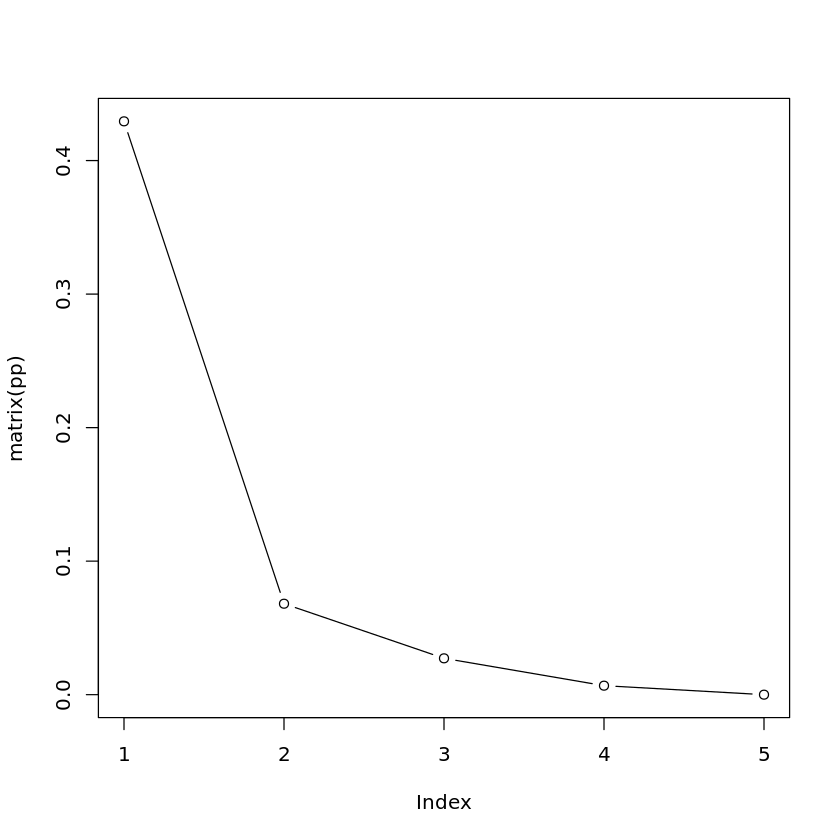

In [58]:
pp <- list()
for (i in 1:p){
    pp[[i]] <- (1 - (sum(Lambdas[1:i]) / sum(Lambdas)))
}
plot(matrix(pp), type='b')

In [54]:
p

[1] 5